<a href="https://colab.research.google.com/github/john2408/ml_algorithms_basics/blob/main/Supervised_and_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implemenation of ML Algortihms without numpy

## Unsupervised Algorithms

### Hierarchical Clustering

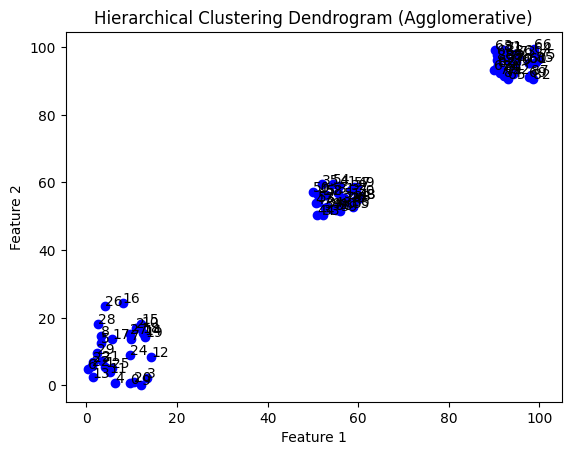

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset with more random data points
random.seed(42)
data = [[random.uniform(0, 15), random.uniform(0, 25)] for _ in range(30)] + \
       [[random.uniform(50, 60), random.uniform(50, 60)] for _ in range(30)] + \
       [[random.uniform(90, 100), random.uniform(90, 100)] for _ in range(30)]

# Step 2: Helper functions
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def compute_distance_matrix(data):
    """Compute the distance matrix for the dataset."""
    n = len(data)
    distance_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            distance_matrix[i][j] = distance_matrix[j][i] = euclidean_distance(data[i], data[j])
    return distance_matrix

def find_closest_clusters(distance_matrix):
    """Find the two closest clusters based on the distance matrix."""
    min_distance = float('inf')
    cluster_pair = (None, None)
    n = len(distance_matrix)
    for i in range(n):
        for j in range(i+1, n):
            if distance_matrix[i][j] < min_distance:
                min_distance = distance_matrix[i][j]
                cluster_pair = (i, j)
    return cluster_pair

def update_distance_matrix(distance_matrix, clusters, cluster1, cluster2):
    """Update the distance matrix after merging two clusters."""
    n = len(distance_matrix)
    for i in range(n):
        if i != cluster1 and i != cluster2:
            new_distance = min(distance_matrix[cluster1][i], distance_matrix[cluster2][i])
            distance_matrix[cluster1][i] = distance_matrix[i][cluster1] = new_distance
    distance_matrix[cluster1][cluster1] = 0
    for row in distance_matrix:
        del row[cluster2]
    del distance_matrix[cluster2]
    clusters[cluster1].extend(clusters[cluster2])
    del clusters[cluster2]

# Step 3: Hierarchical Clustering
def hierarchical_clustering(data):
    """Perform Agglomerative Hierarchical Clustering."""
    clusters = [[i] for i in range(len(data))]
    distance_matrix = compute_distance_matrix(data)

    while len(clusters) > 1:
        cluster1, cluster2 = find_closest_clusters(distance_matrix)
        update_distance_matrix(distance_matrix, clusters, cluster1, cluster2)

    return clusters[0]

# Step 4: Run Hierarchical Clustering
final_cluster = hierarchical_clustering(data)

# Step 5: Plot the dendrogram (simple representation)
def plot_dendrogram(data, clusters):
    """Plot a simple representation of the dendrogram."""
    x_coords = [point[0] for point in data]
    y_coords = [point[1] for point in data]

    plt.scatter(x_coords, y_coords, c='blue')

    for i, txt in enumerate(range(len(data))):
        plt.annotate(txt, (x_coords[i], y_coords[i]))

    plt.title('Hierarchical Clustering Dendrogram (Agglomerative)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_dendrogram(data, final_cluster)

### K-Means

In [ ]:
import random
import math

n = 200
data = [[random.uniform(1, 10), random.uniform(1, 10), random.uniform(1, 10)] for _ in range(n)]

def euclidian_distance(p1, p2):
  return math.sqrt(sum((p1 -p2)**2 for p1, p2 in zip(p1, p2)))

def mean(points):
  n = len(points)
  dimensions = len(points[0])
  return [sum(point[dim] for point in points)/n for dim in range(dimensions)]

def k_means(data, k, max_iter=100, tol=1e-4):
  centroids = random.sample(data, k )
  prev_centroids = centroids
  for _ in range(max_iter):
    clusters = {i : [] for i in range(k)}
    for point in data:
      distances = [euclidian_distance(point, centroid) for centroid in centroids]
      cluster = distances.index(min(distances))
      clusters[cluster].append(point)

    centroids = [mean(clusters[i]) for i in range(k)]

    shift = sum(euclidian_distance(c1, c2) for c1, c2 in zip(centroids, prev_centroids))

    if shift <= tol:
      break

    pre_centroids = centroids

  return clusters, centroids

k = 3
clusters, centroids = k_means(data, k)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

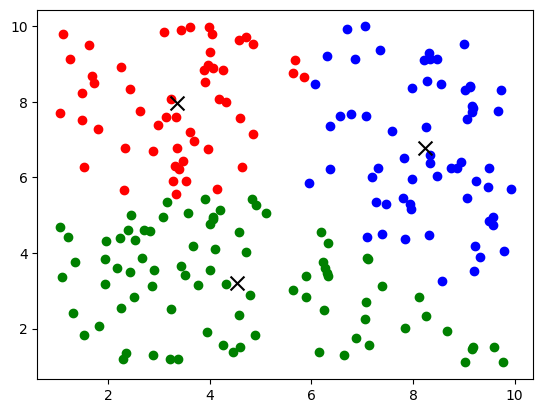

In [ ]:
colors = ['r', 'g', 'b']
for i in range(k):
  cluster_points = np.array(clusters[i])
  X, Y = cluster_points[:,0], cluster_points[:,1]
  cx, cy = centroids[i][0], centroids[i][1]

  plt.scatter(X, Y, c= colors[i], label=f"Cluster {i}")
  plt.scatter(cx, cy, color='black', marker="x", s=100, label=f"Centroid {i}")

### Elbow Method

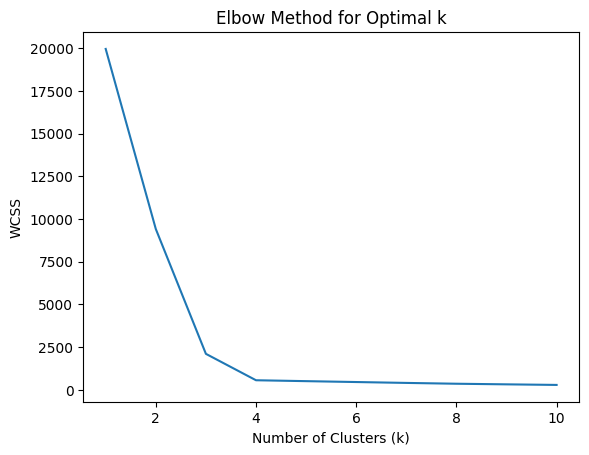

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Example data (replace with your own data)
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 1: Compute WCSS for a range of k values
wcss = []
for k in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Step 2: Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

### DBSCAN Clustering

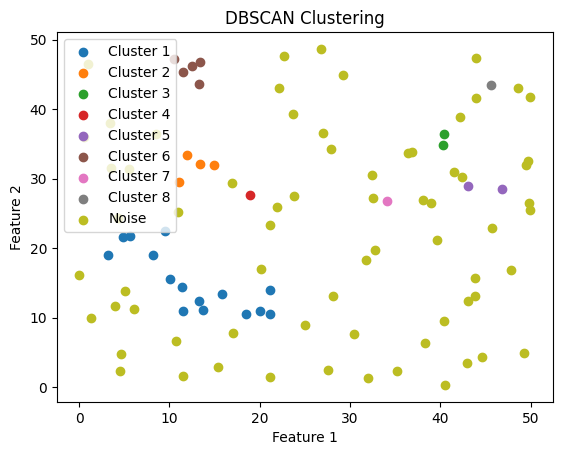

In [ ]:
import math
import random

# Step 1: Helper Functions
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def region_query(data, point_idx, epsilon):
    """Find points in the epsilon neighborhood of the point with index point_idx."""
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_idx], data[i]) < epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_idx, cluster_id, epsilon, min_points):
    """Expand the cluster by finding all density-reachable points."""
    neighbors = region_query(data, point_idx, epsilon)
    if len(neighbors) < min_points:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        for neighbor_idx in neighbors:
            if labels[neighbor_idx] == 0:  # Unvisited
                labels[neighbor_idx] = cluster_id
                expand_cluster(data, labels, neighbor_idx, cluster_id, epsilon, min_points)
        return True

def dbscan(data, epsilon, min_points):
    """Perform DBSCAN clustering."""
    labels = [0] * len(data)  # 0 indicates unvisited
    cluster_id = 0

    for point_idx in range(len(data)):
        if labels[point_idx] == 0:  # If the point is unvisited
            if expand_cluster(data, labels, point_idx, cluster_id + 1, epsilon, min_points):
                cluster_id += 1

    return labels

# Step 2: Generate a synthetic dataset
random.seed(42)
data = [[random.uniform(0, 50), random.uniform(0, 50)] for _ in range(100)]

# Step 3: Run DBSCAN
epsilon = 5
min_points = 5
labels = dbscan(data, epsilon, min_points)

# Step 4: Visualization
import matplotlib.pyplot as plt

def plot_dbscan(data, labels):
    """Plot the clustering results of DBSCAN."""
    unique_labels = set(labels)
    for label in unique_labels:
        cluster_points = [data[i] for i in range(len(data)) if labels[i] == label]
        x_coords = [point[0] for point in cluster_points]
        y_coords = [point[1] for point in cluster_points]
        plt.scatter(x_coords, y_coords, label=f'Cluster {label}' if label != -1 else 'Noise')

    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_dbscan(data, labels)

### Gaussian Mixture Models

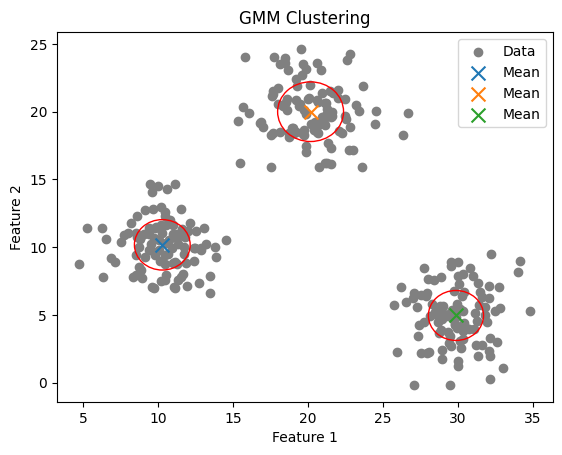

In [ ]:
import random
import math
from collections import defaultdict

# Step 1: Generate synthetic data
random.seed(42)
data = [[random.gauss(10, 2), random.gauss(10, 2)] for _ in range(100)] + \
       [[random.gauss(20, 2), random.gauss(20, 2)] for _ in range(100)] + \
       [[random.gauss(30, 2), random.gauss(5, 2)] for _ in range(100)]

# Helper functions
def gaussian_pdf(x, mean, cov):
    """Calculate the probability density function of a Gaussian."""
    size = len(x)
    det = math.prod([cov[i][i] for i in range(size)])
    norm_const = 1.0 / (math.pow((2 * math.pi), float(size) / 2) * math.pow(det, 1.0 / 2))
    x_mu = [x[i] - mean[i] for i in range(size)]
    inv_cov = [[1 / cov[i][i] if i == j else 0 for j in range(size)] for i in range(size)]
    result = math.exp(-0.5 * sum(x_mu[i] * inv_cov[i][i] * x_mu[i] for i in range(size)))
    return norm_const * result

# Step 2: GMM Initialization
K = 3  # Number of Gaussian components
means = [[random.uniform(0, 40), random.uniform(0, 40)] for _ in range(K)]
covariances = [[[5, 0], [0, 5]] for _ in range(K)]
weights = [1 / K] * K

# Step 3: Expectation-Maximization
def gmm_em(data, means, covariances, weights, max_iter=100):
    """Fit a Gaussian Mixture Model using the EM algorithm."""
    for _ in range(max_iter):
        # E-step: Calculate responsibilities
        responsibilities = defaultdict(list)
        for i, x in enumerate(data):
            probs = [weights[k] * gaussian_pdf(x, means[k], covariances[k]) for k in range(K)]
            total_prob = sum(probs)
            responsibilities[i] = [prob / total_prob for prob in probs]

        # M-step: Update parameters
        for k in range(K):
            Nk = sum(responsibilities[i][k] for i in range(len(data)))
            weights[k] = Nk / len(data)
            means[k] = [sum(responsibilities[i][k] * data[i][dim] for i in range(len(data))) / Nk for dim in range(2)]
            covariances[k] = [[0, 0], [0, 0]]
            for i in range(len(data)):
                diff = [data[i][dim] - means[k][dim] for dim in range(2)]
                for j in range(2):
                    covariances[k][j][j] += responsibilities[i][k] * diff[j] * diff[j] / Nk

    return means, covariances, weights

# Step 4: Run GMM
final_means, final_covariances, final_weights = gmm_em(data, means, covariances, weights)

# Step 5: Visualization
import matplotlib.pyplot as plt

def plot_gmm(data, means, covariances):
    """Plot the GMM clustering results."""
    x_coords = [point[0] for point in data]
    y_coords = [point[1] for point in data]
    plt.scatter(x_coords, y_coords, c='gray', label='Data')

    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], s=100, marker='x', label='Mean')
        plt.gca().add_patch(plt.Circle(mean, math.sqrt(cov[0][0]), color='r', fill=False))

    plt.title('GMM Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_gmm(data, final_means, final_covariances)

## Basic Statistics

In [ ]:
def mean(X):
  return sum(X)/len(X)

def standard_deviation(X):
  n = len(X)
  mean_x = mean(X)
  var = (1/n) * sum((x - mean_x) **2 for x in X)
  return math.sqrt(var)


def covariance(X, Y):
  n = len(X)
  mean_x = mean(X)
  mean_y = mean(Y)
  cov = (1/n)*sum((x - mean_x)*(y-mean_y) for x,y in zip(X,Y))
  return cov


def correlation(X, Y):
  cov = covariance(X, Y)
  std_x = standard_deviation(X)
  std_y = standard_deviation(Y)
  return cov/(std_x * std_y)

X = [random.gauss(10, 2) for _ in range(100)]
Y = [random.gauss(5, 3) for _ in range(100)]

In [ ]:
print("Standard Deviation ", standard_deviation(X))
print("Mean ", mean(X))
print("Covariance ", covariance(X, Y))
print("Correlation ", correlation(X, Y))

Standard Deviation  2.0672694918544443
Mean  9.842752524899739
Covariance  -0.030146597759115483
Correlation  -0.004495099575369531


## Supervised Learning

### KNN - K-Nearest Neighbors

Predicted Class: 0


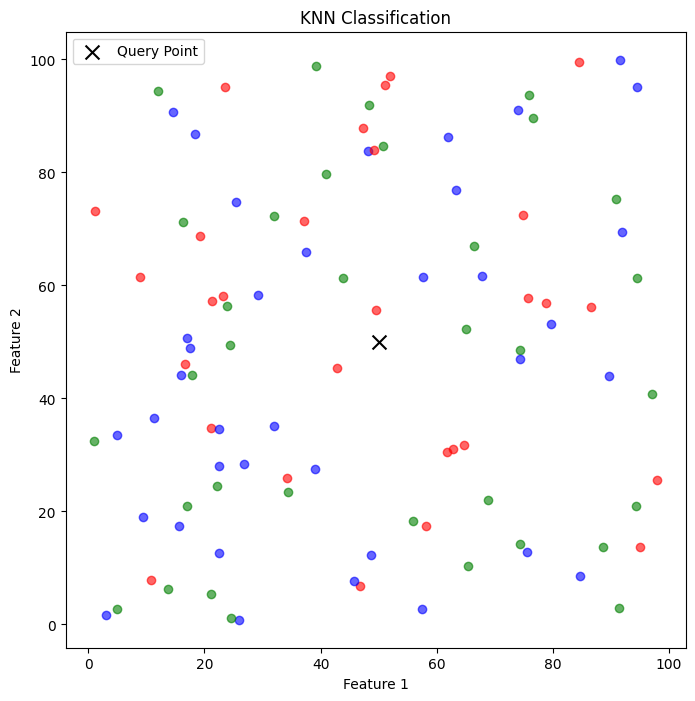

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(num_points, dimensions, num_classes):
    data = []
    for _ in range(num_points):
        point = [random.uniform(0, 100) for _ in range(dimensions)]
        label = random.randint(0, num_classes - 1)
        data.append((point, label))
    return data

def euclidian_distance(p1, p2):
    return math.sqrt(sum((p1-p2) **2 for p1, p2 in zip(p1,p2)))

def knn_predict(data, query, k):
    distances = [(euclidian_distance(query,X), label) for X, label in data]
    sorted_distances = sorted(distances, key=lambda x: x[0])
    neighbors = sorted_distances[:k]
    class_votes = {}
    for _,label in neighbors:
      if label in class_votes:
        class_votes[label] += 1
      else:
        class_votes[label] = 1
    return max(class_votes, key=class_votes.get)
# Example usage
data = generate_data(num_points=100, dimensions=2, num_classes=3)
query_point = [50, 50]
k = 5
predicted_class = knn_predict(data, query_point, k)
print("Predicted Class:", predicted_class)

# Plotting the data points
colors = ['r', 'g', 'b']  # Colors for the classes
plt.figure(figsize=(8, 8))

# Plot the data points with their class colors
for point, label in data:
    plt.scatter(point[0], point[1], color=colors[label], alpha=0.6)

# Highlight the query point
plt.scatter(query_point[0], query_point[1], color='k', marker='x', s=100, label='Query Point')

# Title and labels
plt.title('KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Decision Trees

In [ ]:
import random

# Generate synthetic data (for binary classification)
def generate_data(num_points, dimensions):
    data = []
    for _ in range(num_points):
        point = [random.uniform(0, 100) for _ in range(dimensions)]
        label = 1 if sum(point) > 50 * dimensions else 0  # Simple linear decision boundary
        data.append((point, label))
    return data

# Function to calculate Gini Impurity
def gini_impurity(labels):
    total = len(labels)
    if total == 0:
        return 0
    count = sum(labels)
    prob_1 = count / total
    prob_0 = 1 - prob_1
    return 1 - prob_1**2 - prob_0**2

# Function to split dataset based on a feature and threshold
def split_data(data, feature_index, threshold):
    left_split = [item for item in data if item[0][feature_index] <= threshold]
    right_split = [item for item in data if item[0][feature_index] > threshold]
    return left_split, right_split

# Function to find the best split
def find_best_split(data):
    best_gini = float('inf')
    best_split = None
    best_feature = None
    best_threshold = None

    num_features = len(data[0][0])

    for feature_index in range(num_features):
        thresholds = set(item[0][feature_index] for item in data)
        for threshold in thresholds:
            left_split, right_split = split_data(data, feature_index, threshold)
            left_labels = [label for _, label in left_split]
            right_labels = [label for _, label in right_split]
            gini = (len(left_split) / len(data)) * gini_impurity(left_labels) + \
                   (len(right_split) / len(data)) * gini_impurity(right_labels)
            if gini < best_gini:
                best_gini = gini
                best_split = (left_split, right_split)
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold, best_split

# Decision Tree Node
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Function to build the decision tree
def build_tree(data, max_depth, current_depth=0):
    labels = [label for _, label in data]
    if len(set(labels)) == 1 or current_depth == max_depth:
        return Node(value=labels[0])

    feature_index, threshold, (left_split, right_split) = find_best_split(data)

    if not left_split or not right_split:
        return Node(value=max(set(labels), key=labels.count))

    left_child = build_tree(left_split, max_depth, current_depth + 1)
    right_child = build_tree(right_split, max_depth, current_depth + 1)

    return Node(feature_index=feature_index, threshold=threshold, left=left_child, right=right_child)

# Function to predict using the decision tree
def predict(node, sample):
    if node.value is not None:
        return node.value
    if sample[node.feature_index] <= node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

# Example usage
data = generate_data(num_points=100, dimensions=2)
tree = build_tree(data, max_depth=3)

# Predict on a sample
sample = [30, 40]
print("Predicted Class:", predict(tree, sample))

Predicted Class: 1


### Logistics Regression

In [ ]:

import math
import random

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# Hypothesis function
def predict_proba(X, theta):
    z = sum(x * t for x, t in zip(X, theta))
    return sigmoid(z)

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    total_cost = 0
    for i in range(m):
        h = predict_proba(X[i], theta)
        total_cost += -y[i] * math.log(h) - (1 - y[i]) * math.log(1 - h)
    return total_cost / m

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradients = [0] * len(theta)
        for i in range(m):
            h = predict_proba(X[i], theta)
            for j in range(len(theta)):
                gradients[j] += (h - y[i]) * X[i][j]
        theta = [t - learning_rate * g / m for t, g in zip(theta, gradients)]
    return theta

# Example dataset
data = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(100)]
labels = [1 if x[0] + x[1] > 100 else 0 for x in data]
X = [[1] + list(x) for x in data]  # Add intercept term (bias)
y = labels

# Initialize parameters
theta = [0] * len(X[0])
learning_rate = 0.01
num_iterations = 1000

# Train logistic regression model
theta = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Predict for a new sample
sample = [1, 45, 55]  # Add intercept term
probability = predict_proba(sample, theta)
predicted_class = 1 if probability >= 0.5 else 0
print("Predicted Probability:", probability)
print("Predicted Class:", predicted_class)

Predicted Probability: 0.9989311218664533
Predicted Class: 1


### Multivariate Linear Regresssion

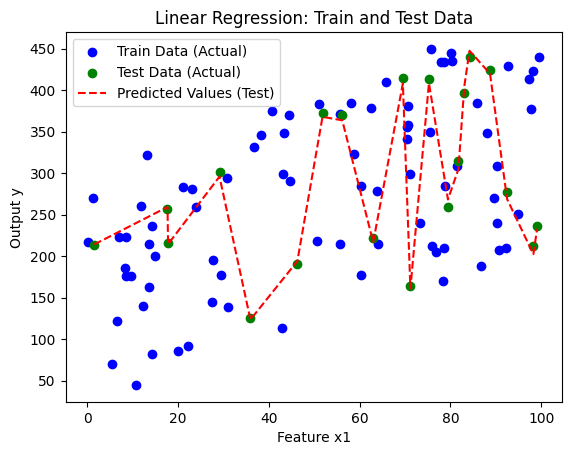

Mean Squared Error on Test Data: 18.105704575012957


In [ ]:
import random
import matplotlib.pyplot as plt

# Hypothesis function (linear combination of weights and features)
def predict(X, theta):
    return sum(x * t for x, t in zip(X, theta))

# Mean Squared Error Cost Function
def compute_mse(X, y, theta):
    m = len(y)
    total_cost = sum((predict(X[i], theta) - y[i])**2 for i in range(m))
    return total_cost / (2 * m)

# Gradient Descent for Linear Regression
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradients = [0] * len(theta)
        for i in range(m):
            error = predict(X[i], theta) - y[i]
            for j in range(len(theta)):
                gradients[j] += error * X[i][j]
        theta = [t - learning_rate * g / m for t, g in zip(theta, gradients)]
    return theta

# Train-Test Split
def train_test_split(X, y, test_size=0.2):
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data, test_data = data[:split_index], data[split_index:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(y_train), list(X_test), list(y_test)

# Example dataset
data = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(100)]
outputs = [2 * x[0] + 3 * x[1] + 5 + random.uniform(-10, 10) for x in data]  # y = 2x1 + 3x2 + 5 + noise
X = [[1] + list(x) for x in data]  # Add intercept term (bias)
y = outputs

# Split the dataset
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

# Initialize parameters
theta = [0] * len(X[0])
learning_rate = 0.0001
num_iterations = 1000

# Train the Linear Regression model
theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Predictions on test set
predicted_vals_test = [predict(x, theta) for x in X_test]

# Extract x1 for plotting
x1_train_vals = [x[1] for x in X_train]
x1_test_vals = [x[1] for x in X_test]

# Sorting for a smoother plot line
sorted_pairs_test = sorted(zip(x1_test_vals, predicted_vals_test))
x1_test_sorted, predicted_test_sorted = zip(*sorted_pairs_test)

# Plotting
plt.scatter(x1_train_vals, y_train, color='blue', label='Train Data (Actual)')
plt.scatter(x1_test_vals, y_test, color='green', label='Test Data (Actual)')
plt.plot(x1_test_sorted, predicted_test_sorted, color='red', label='Predicted Values (Test)', linestyle='dashed')

# Labels and legend
plt.xlabel('Feature x1')
plt.ylabel('Output y')
plt.title('Linear Regression: Train and Test Data')
plt.legend()
plt.show()

# Evaluate on test data
mse_test = compute_mse(X_test, y_test, theta)
print("Mean Squared Error on Test Data:", mse_test)

### Univariate Linear Regression

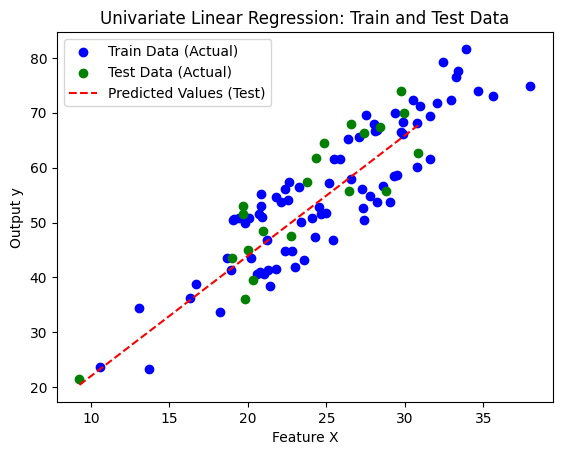

Mean Squared Error on Test Data: 19.892196758648122


In [ ]:
import random
import matplotlib.pyplot as plt

# Hypothesis function (linear combination of weights and features)
def predict(X, theta):
    return X[0] * theta[0] + X[1] * theta[1]

# Mean Squared Error Cost Function
def compute_mse(X, y, theta):
    m = len(y)
    total_cost = sum((predict([1, X[i]], theta) - y[i])**2 for i in range(m))
    return total_cost / (2 * m)

# Gradient Descent for Linear Regression
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradients = [0, 0]
        for i in range(m):
            error = predict([1, X[i]], theta) - y[i]
            gradients[0] += error
            gradients[1] += error * X[i]
        theta[0] -= learning_rate * gradients[0] / m
        theta[1] -= learning_rate * gradients[1] / m
    return theta

# Train-Test Split
def train_test_split(X, y, test_size=0.2):
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data, test_data = data[:split_index], data[split_index:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(y_train), list(X_test), list(y_test)

# Example univariate dataset
X = [random.gauss(25, 5) for _ in range(100)]
y = [2 * x + 5 + random.uniform(-10, 10) for x in X]  # y = 2x + 5 + noise

# Split the dataset
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

# Initialize parameters
theta = [0, 0]  # [bias, weight]
learning_rate = 0.0001
num_iterations = 1000

# Train the Linear Regression model
theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Predictions on test set
predicted_vals_test = [predict([1, x], theta) for x in X_test]

# Sorting for a smoother plot line
sorted_pairs_test = sorted(zip(X_test, predicted_vals_test))
X_test_sorted, predicted_test_sorted = zip(*sorted_pairs_test)

# Plotting
plt.scatter(X_train, y_train, color='blue', label='Train Data (Actual)')
plt.scatter(X_test, y_test, color='green', label='Test Data (Actual)')
plt.plot(X_test_sorted, predicted_test_sorted, color='red', label='Predicted Values (Test)', linestyle='dashed')

# Labels and legend
plt.xlabel('Feature X')
plt.ylabel('Output y')
plt.title('Univariate Linear Regression: Train and Test Data')
plt.legend()
plt.show()

# Evaluate on test data
mse_test = compute_mse(X_test, y_test, theta)
print("Mean Squared Error on Test Data:", mse_test)

### Single Perceptron Neural Network

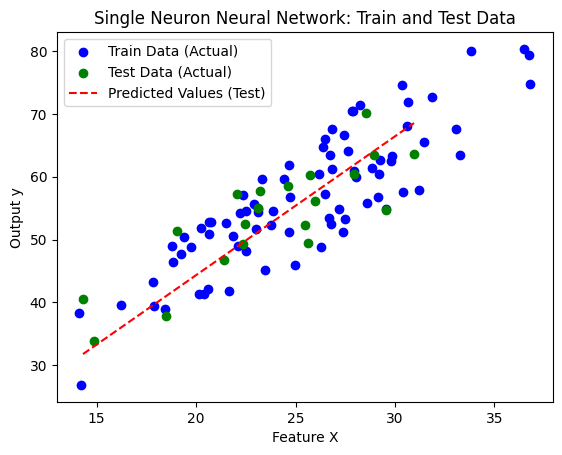

Mean Squared Error on Test Data: 14.834437376155545


In [5]:
import random
import matplotlib.pyplot as plt

# Hypothesis function (linear combination of weights and input)
def predict(X, weight, bias):
    return X * weight + bias

# Mean Squared Error Cost Function
def compute_mse(X, y, weight, bias):
    m = len(y)
    total_cost = sum((predict(X[i], weight, bias) - y[i])**2 for i in range(m))
    return total_cost / (2 * m)

# Gradient Descent for a Single Neuron
def gradient_descent(X, y, weight, bias, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        weight_gradient = 0
        bias_gradient = 0
        for i in range(m):
            error = predict(X[i], weight, bias) - y[i]
            weight_gradient += error * X[i]
            bias_gradient += error
        weight -= learning_rate * weight_gradient / m
        bias -= learning_rate * bias_gradient / m
    return weight, bias

# Train-Test Split
def train_test_split(X, y, test_size=0.2):
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data, test_data = data[:split_index], data[split_index:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(y_train), list(X_test), list(y_test)

# Example univariate dataset
X = [random.gauss(25, 5 ) for _ in range(100)]
y = [2 * x + 5 + random.uniform(-10, 10) for x in X]  # y = 2x + 5 + noise

# Split the dataset
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

# Initialize parameters
weight = 0
bias = 0
learning_rate = 0.0001
num_iterations = 1000

# Train the Single Neuron model
weight, bias = gradient_descent(X_train, y_train, weight, bias, learning_rate, num_iterations)

# Predictions on test set
predicted_vals_test = [predict(x, weight, bias) for x in X_test]

# Sorting for a smoother plot line
sorted_pairs_test = sorted(zip(X_test, predicted_vals_test))
X_test_sorted, predicted_test_sorted = zip(*sorted_pairs_test)

# Plotting
plt.scatter(X_train, y_train, color='blue', label='Train Data (Actual)')
plt.scatter(X_test, y_test, color='green', label='Test Data (Actual)')
plt.plot(X_test_sorted, predicted_test_sorted, color='red', label='Predicted Values (Test)', linestyle='dashed')

# Labels and legend
plt.xlabel('Feature X')
plt.ylabel('Output y')
plt.title('Single Neuron Neural Network: Train and Test Data')
plt.legend()
plt.show()

# Evaluate on test data
mse_test = compute_mse(X_test, y_test, weight, bias)
print("Mean Squared Error on Test Data:", mse_test)

### Deep Neural Network

Mean Squared Error on Test Data: 5.3510427172198


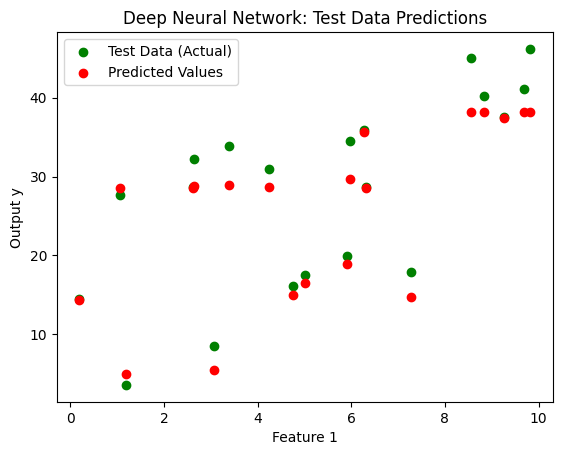

In [6]:
import random
import math
import matplotlib.pyplot as plt

# Utility functions
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Deep Neural Network Class
class DeepNeuralNetwork:
    def __init__(self):
        # Initialize weights and biases for the network
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(3)]  # 2 input features, 3 hidden neurons
        self.bias_hidden = [random.uniform(-1, 1) for _ in range(3)]
        self.weights_hidden_output = [random.uniform(-1, 1) for _ in range(3)]  # 3 hidden neurons, 1 output neuron
        self.bias_output = random.uniform(-1, 1)

    def predict(self, inputs):
        # Forward pass
        hidden_layer_activation = [sum(inputs[j] * self.weights_input_hidden[i][j] for j in range(2)) + self.bias_hidden[i] for i in range(3)]
        hidden_layer_output = [sigmoid(activation) for activation in hidden_layer_activation]
        output_layer_input = sum(hidden_layer_output[i] * self.weights_hidden_output[i] for i in range(3)) + self.bias_output
        output = output_layer_input  # No activation function for regression
        return output

    def train(self, X, y, learning_rate, num_iterations):
        for _ in range(num_iterations):
            for i in range(len(X)):
                # Forward pass
                inputs = X[i]
                hidden_layer_activation = [sum(inputs[j] * self.weights_input_hidden[k][j] for j in range(2)) + self.bias_hidden[k] for k in range(3)]
                hidden_layer_output = [sigmoid(activation) for activation in hidden_layer_activation]
                output_layer_input = sum(hidden_layer_output[k] * self.weights_hidden_output[k] for k in range(3)) + self.bias_output
                output = output_layer_input  # No activation function for regression

                # Error calculation
                error = output - y[i]

                # Backward pass
                # Gradient for output layer
                output_layer_gradient = error

                # Gradients for hidden layer
                hidden_layer_gradients = [output_layer_gradient * self.weights_hidden_output[k] * sigmoid_derivative(hidden_layer_activation[k]) for k in range(3)]

                # Update weights and biases
                for k in range(3):
                    self.weights_hidden_output[k] -= learning_rate * output_layer_gradient * hidden_layer_output[k]
                    for j in range(2):
                        self.weights_input_hidden[k][j] -= learning_rate * hidden_layer_gradients[k] * inputs[j]
                    self.bias_hidden[k] -= learning_rate * hidden_layer_gradients[k]
                self.bias_output -= learning_rate * output_layer_gradient

    def compute_mse(self, X, y):
        errors = [(self.predict(X[i]) - y[i])**2 for i in range(len(X))]
        mse = sum(errors) / (2 * len(X))
        return mse

# Example dataset with 2 features and 1 target value
X = [[random.uniform(0, 10), random.uniform(0, 10)] for _ in range(100)]
y = [2*x[0] + 3*x[1] + random.uniform(-1, 1) for x in X]

# Train-test split
def train_test_split(X, y, test_size=0.2):
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data, test_data = data[:split_index], data[split_index:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(y_train), list(X_test), list(y_test)

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and train the network
dnn = DeepNeuralNetwork()
dnn.train(X_train, y_train, learning_rate=0.01, num_iterations=1000)

# Predictions
predicted_vals_test = [dnn.predict(x) for x in X_test]

# Evaluate the model
mse_test = dnn.compute_mse(X_test, y_test)
print("Mean Squared Error on Test Data:", mse_test)

# Plotting (for 2D representation, using the first feature as x-axis)
plt.scatter([x[0] for x in X_test], y_test, color='green', label='Test Data (Actual)')
plt.scatter([x[0] for x in X_test], predicted_vals_test, color='red', label='Predicted Values')

# Labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Output y')
plt.title('Deep Neural Network: Test Data Predictions')
plt.legend()
plt.show()